Total de imágenes: 3631
Conteo de anotaciones por clase:
- fingers positive: 531
- shoulder fracture: 360
- elbow positive: 339
- forearm fracture: 316
- humerus fracture: 311
- wrist positive: 228
- humerus: 3


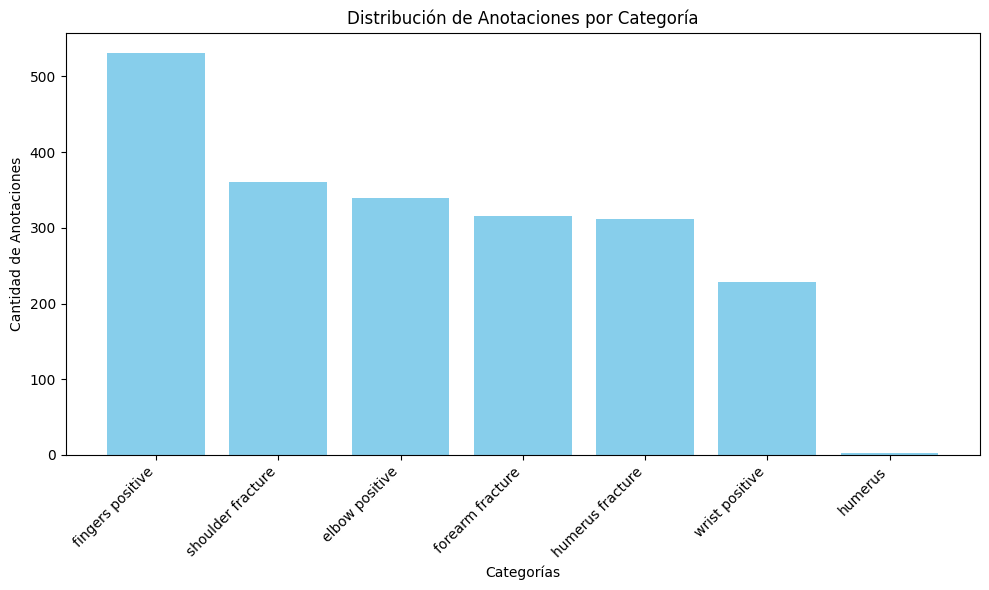

In [ ]:
import json
from collections import Counter
import matplotlib.pyplot as plt

# Ruta local o en Colab
ruta = "/content/drive/MyDrive/03Proyecto_Tesis/01PIC/bonefracturedetection.v4-v4.coco(1)/train/_annotations.coco.json"

# Cargar JSON
with open(ruta, "r") as f:
    data = json.load(f)

# Categorías
categories = {cat["id"]: cat["name"] for cat in data["categories"]}

# Anotaciones por categoría
annotations = data.get("annotations", [])
category_counts = Counter([ann["category_id"] for ann in annotations])
category_name_counts = {categories[cat_id]: count for cat_id, count in category_counts.items()}

# Total imágenes
total_images = len(data.get("images", []))
print(f"Total de imágenes: {total_images}")
print("Conteo de anotaciones por clase:")
for cat, count in category_name_counts.items():
    print(f"- {cat}: {count}")

# Gráfico
plt.figure(figsize=(10, 6))
plt.bar(category_name_counts.keys(), category_name_counts.values(), color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title("Distribución de Anotaciones por Categoría")
plt.xlabel("Categorías")
plt.ylabel("Cantidad de Anotaciones")
plt.tight_layout()
plt.show()


In [ ]:
import json
from collections import Counter

# Cargar el archivo
with open("/content/drive/MyDrive/03Proyecto_Tesis/01PIC/bonefracturedetection.v4-v4.coco(1)/train/_annotations.coco.json", "r") as f:  # Asegúrate de subir tu archivo si usas Colab
    data = json.load(f)

# 1. Tamaño promedio de las imágenes
dims = [(img["width"], img["height"]) for img in data["images"]]
avg_width = sum(w for w, h in dims) / len(dims)
avg_height = sum(h for w, h in dims) / len(dims)

print(f"📐 Tamaño promedio de imágenes: {avg_width:.2f} x {avg_height:.2f} (ancho x alto)")

# 2. Cuántas anotaciones hay por imagen
annotations = data.get("annotations", [])
ann_per_image = Counter([ann["image_id"] for ann in annotations])

print(f"🔢 Anotaciones promedio por imagen: {sum(ann_per_image.values()) / len(ann_per_image):.2f}")
print(f"🔝 Máximo de anotaciones en una imagen: {max(ann_per_image.values())}")
print(f"🔻 Mínimo de anotaciones en una imagen: {min(ann_per_image.values())}")

# 3. Imágenes sin anotaciones
image_ids_all = set(img["id"] for img in data["images"])
image_ids_with_anns = set(ann_per_image.keys())
image_ids_without_anns = image_ids_all - image_ids_with_anns

print(f"🚫 Imágenes sin anotaciones: {len(image_ids_without_anns)} de {len(image_ids_all)} totales")


📐 Tamaño promedio de imágenes: 412.03 x 485.74 (ancho x alto)
🔢 Anotaciones promedio por imagen: 1.16
🔝 Máximo de anotaciones en una imagen: 3
🔻 Mínimo de anotaciones en una imagen: 1
🚫 Imágenes sin anotaciones: 1827 de 3631 totales


In [ ]:
import json

# Cargar archivo COCO
with open("/content/drive/MyDrive/03Proyecto_Tesis/01PIC/bonefracturedetection.v4-v4.coco(1)/train/_annotations.coco.json", "r") as f:  # Ajusta la ruta si es necesario
    data = json.load(f)

# Categorías objetivo
target_categories = ["shoulder fracture", "humerus fracture"]

# Obtener IDs de esas categorías
category_ids = {cat["id"] for cat in data["categories"] if cat["name"] in target_categories}

# Filtrar anotaciones con esas categorías
annotations = data.get("annotations", [])
filtered_annotations = [ann for ann in annotations if ann["category_id"] in category_ids]

# Obtener IDs únicos de imágenes con esas fracturas
image_ids_with_fractures = {ann["image_id"] for ann in filtered_annotations}

# Resultado
print(f"🦴 Total de imágenes con 'shoulder fracture' o 'humerus fracture': {len(image_ids_with_fractures)}")


🦴 Total de imágenes con 'shoulder fracture' o 'humerus fracture': 614
